In [2]:
import pandas as pd

num_lines_to_load = 10

# Initialize an empty list to store the chunks
chunks = []

# Read the jsonl file in chunks
for chunk in pd.read_json(
    "../experiments/qwen06_results/qwen06_chunks_adds3_search_results.jsonl", lines=True, chunksize=num_lines_to_load
):
    chunks.append(chunk)
    # Stop after loading the desired number of lines
    if len(pd.concat(chunks)) >= num_lines_to_load:
        break

# Concatenate the chunks into a single DataFrame
df = pd.concat(chunks).head(num_lines_to_load)
df.head()

,record,results
0,{'source_doi': '10.1146/annurev-astro-081811-1...,"[{'doi': '10.1111/j.1365-2966.2010.18165.x', '..."
1,{'source_doi': '10.1146/annurev-astro-081811-1...,"[{'doi': '10.1111/j.1365-2966.2010.18165.x', '..."
2,{'source_doi': '10.1146/annurev-astro-081811-1...,"[{'text': 'Finally, it is interesting to consi..."
3,{'source_doi': '10.1146/annurev-astro-081811-1...,"[{'text': 'Despite this, pre‐heating does prov..."
4,{'source_doi': '10.1146/annurev-astro-081811-1...,"[{'doi': '10.1086/174221', 'pubdate': 19940601..."


In [3]:
from pprint import pprint
row = df.iloc[0]

record = row['record']
results = row['results']

pprint(record)


{'citation_dois': ['10.1086/519729'],
 'expanded_query': None,
 'pubdate': 20120901,
 'resolved_bibcodes': ['2007ApJ...666..147G'],
 'sent_cit_masked': '[REF] find an increasing stellar fraction with decreasing '
                    'group/cluster mass, peaking below 10 14 M ⊙ , where '
                    'stellar and gas masses are equal.',
 'sent_idx': 506,
 'sent_no_cit': ' find an increasing stellar fraction with decreasing '
                'group/cluster mass, peaking below 10 14 M ⊙ , where stellar '
                'and gas masses are equal.',
 'sent_original': 'Gonzalez, Zaritsky Zabludoff (2007) find an increasing '
                  'stellar fraction with decreasing group/cluster mass, '
                  'peaking below 10 14 M ⊙ , where stellar and gas masses are '
                  'equal.',
 'source_doi': '10.1146/annurev-astro-081811-125521'}


In [5]:
print(type(results))
print(len(results))

<class 'list'>
1000


In [10]:
pprint(results[3])

{'citation_count': 125,
 'doi': '10.1086/174264',
 'metric': 0.729299545288085,
 'pubdate': 19940601,
 'text': 'Three curves are shown for the integrated stellar mass in Figure 5 '
         'corresponding to core radii of 1 10, 180, and 300 kpc for the '
         'galaxies. The stellar mass of the group is normalized using the '
         'total optical luminosity within 500 kpc (LB = 2.3 x 101 1 L®) and a '
         'massto-light ratio of 8 MQ/LØ. For NGC 5044 we use a modified King '
         'profile for the density distribution based on the observed '
         'line-of-sight velocity dispersion of 234 km s ~ (Davies et al. 1987) '
         'and an assumed core radius of 500 pc. The gas mass and the total '
         'gravitating mass are the most precisely known quantities since their '
         'estimates are based on the analysis of 65,000 photons. The stellar '
         'mass distribution is the least well known quantity due to the large '
         'uncertainty in the core radius 

In [11]:
docs = [result['text'] for result in results]
pprint(docs[:5])

['1 Differential hot gas fraction profiles. The solid lines show the mean '
 'relations and the shaded region the 1 σ scatter. The upper, green regions '
 'correspond to clusters with spectroscopic‐like temperatures above 5 keV; the '
 'middle, cyan regions to 2.5–5 keV and the lower, magenta regions to clusters '
 'in the range 1–2.5 keV. Profiles are only plotted for radii greater than the '
 'gravitational softening length. The dashed line in each case shows the '
 'cosmic mean. For the GO run the gas fraction plateaus at a value of '
 '0.16–0.17 at about 0.3 r 500 , although there is a very slow increase at '
 'larger radii (beyond the right‐hand edge of the plot). This is less than the '
 'global baryon fraction of 0.18: conversion of kinetic energy into heat, '
 'together with continual stirring of the gas by the motion of dark matter '
 'structures, allows the gas to pick up energy at the expense of the dark '
 'matter (e.g. Pearce, Thomas Couchman 1994). This is particularly ev

In [18]:
import re
query_text = record['sent_no_cit']
# Split on whitespace or slash
print(re.split(r'[\s]+', query_text))

['', 'find', 'an', 'increasing', 'stellar', 'fraction', 'with', 'decreasing', 'group/cluster', 'mass,', 'peaking', 'below', '10', '14', 'M', '⊙', ',', 'where', 'stellar', 'and', 'gas', 'masses', 'are', 'equal.']


In [20]:
for idx, row in df.iterrows():
    record = row['record']
    results = row['results']
    row['results'] = sorted(results, key=lambda r: len(r['text']))

In [ ]:
# src/citeline/statistics
# from statistics import compute_statistics
from citeline.statistics import compute_statistics

stats = compute_statistics(df.to_dict(orient='records'))
pprint(stats)

Computing statistics: 100%|██████████| 10/10 [00:00<00:00, 621.28it/s]

{'hitrate': array([0. , 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 

In [23]:
stats.keys()

dict_keys(['hitrate', 'iou', 'recall'])

In [24]:
stats['hitrate']

array([0. , 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
       0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.

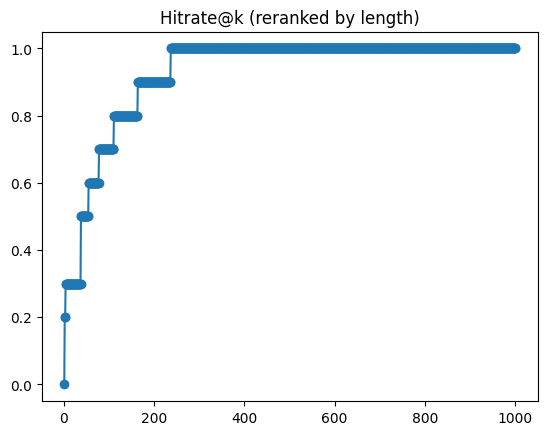

In [25]:
import matplotlib.pyplot as plt

# Plot the hitrate
plt.plot(range(1, len(stats['hitrate']) + 1), stats['hitrate'], marker='o')
plt.title('Hitrate@k (reranked by length)')
plt.show()
